In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Read data

In [3]:
df = pd.read_csv('output_big.csv')

In [4]:
df_best_parameters = pd.read_csv('output_best_parameters.csv')

In [5]:
df_best_parameters.describe()

,device,hidden_channels,dropout,run_number,lr,epochs,batch_size,hidden_state_factor,l1_weight,l2_weight,...,epoch,optimization_l1,optimization_l2,optimization_loss,train_loss,train_acc,valid_loss,valid_acc,generalization_loss,generalization_acc
count,240000.0,240000.0,2.400000e+05,240000.000000,240000.000000,240000.0,240000.0,240000.0,2.400000e+05,2.400000e+05,...,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05,240000.000000,2.400000e+05,240000.000000,2.399900e+05,240000.000000
mean,0.0,8.0,2.000000e-01,2.000000,0.000072,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,500.500000,70.282078,39.744588,0.073045,4.759143e-02,0.972608,5.140686e-02,0.968577,2.416659e+29,0.884823
std,0.0,0.0,1.110225e-16,1.414217,0.000122,0.0,0.0,0.0,4.065767e-20,4.065767e-20,...,288.675592,333.704706,179.981219,0.166889,1.348323e-01,0.083379,1.488655e-01,0.095714,1.136124e+32,0.173794
min,0.0,8.0,2.000000e-01,0.000000,0.000010,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,1.000000,0.131059,0.101653,0.000000,0.000000e+00,0.401875,0.000000e+00,0.420000,0.000000e+00,0.010000
25%,0.0,8.0,2.000000e-01,1.000000,0.000010,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,250.750000,4.117712,2.076908,0.000018,9.566542e-08,1.000000,6.258486e-08,1.000000,2.203810e-06,0.778000
50%,0.0,8.0,2.000000e-01,2.000000,0.000010,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,500.500000,6.037361,2.807830,0.000305,1.438401e-06,1.000000,1.322923e-06,1.000000,2.724714e-01,0.989000
75%,0.0,8.0,2.000000e-01,3.000000,0.000047,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,750.250000,17.918324,9.811642,0.038326,3.873489e-05,1.000000,2.877983e-05,1.000000,1.526122e+00,1.000000
max,0.0,8.0,2.000000e-01,4.000000,0.000400,1000.0,1.0,4.0,1.000000e-04,1.000000e-04,...,1000.000000,8123.405789,3828.731709,3.659508,5.356088e+00,1.000000,9.447293e+00,1.000000,5.564998e+34,1.000000


# Get the best model per configuration - deprecated, only use last epoch now

In [7]:
filtered = list(filter(lambda column_name: column_name not in ['conv', 'filename', 'verbose', 'slurm', 'epoch', 'lr', 'optimization_l1', 'optimization_l2', 'optimization_loss', 'train_loss', 'train_acc', 'valid_loss', 'valid_acc', 'generalization_loss', 'generalization_acc', 'model_string', 'filename' 'slurm', 'test_tube_slurm_cmd_path', 'hpc_exp_number', 'dataset'], df.columns.values))

In [ ]:
df['epoch_rank'] = df.groupby(filtered + ['dataset', 'conv'], as_index=False)['valid_loss'].rank(method='min')
best_epochs_df = df[(df.epoch_rank == 1)&(df.dataset != 'midpoint')]

In [ ]:
best_epochs_generalization = best_epochs_df.groupby(filtered + ['dataset', 'conv'], as_index=False)['generalization_loss'].last()

In [ ]:
best_models = best_epochs_generalization.groupby(filtered, as_index=False)['generalization_loss'].sum()

In [ ]:
best_models['rank'] = best_models['generalization_loss'].rank(method='min')

# Only the last epoch

In [8]:
best_models = df[(df.epoch == 1000)&(df.dataset!='midoint')]
best_models = best_models.groupby(filtered, as_index=False)['generalization_loss'].sum()
best_models['rank'] = best_models['generalization_loss'].rank(method='min')

## The ten best parameter choices overall

In [9]:
best_models[(best_models['rank'] <= 10)].sort_values(by=['rank'])

,device,hidden_channels,dropout,epochs,runs,batch_size,skip_previous,skip_input,hidden_state_factor,use_weight_decay,use_scheduler,use_l1,l1_weight,use_l2,l2_weight,run,generalization_loss,rank
765,0,10,0.2,1000,1,4,True,True,4,False,True,False,0.0001,True,0.0001,0,0.970159,1.0
477,0,8,0.2,1000,1,4,True,True,4,False,True,False,0.0001,True,0.0001,0,1.061720,2.0
429,0,8,0.2,1000,1,1,True,True,4,False,True,False,0.0001,True,0.0001,0,1.152831,3.0
713,0,10,0.2,1000,1,1,True,True,2,False,True,False,0.0001,True,0.0001,0,1.767400,4.0
141,0,6,0.2,1000,1,1,True,True,4,False,True,False,0.0001,True,0.0001,0,2.125038,5.0
815,0,10,0.5,1000,1,1,True,True,4,True,True,False,0.0001,True,0.0001,0,2.168237,6.0
143,0,6,0.2,1000,1,1,True,True,4,True,True,False,0.0001,True,0.0001,0,2.237686,7.0
189,0,6,0.2,1000,1,4,True,True,4,False,True,False,0.0001,True,0.0001,0,2.475523,8.0
761,0,10,0.2,1000,1,4,True,True,2,False,True,False,0.0001,True,0.0001,0,2.712478,9.0
790,0,10,0.5,1000,1,1,False,True,4,True,True,False,0.0001,False,0.0001,0,2.839430,10.0


## The one best model we use for our plots

In [10]:
best_model = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==False)&(df.hidden_channels==8)&(df.hidden_state_factor==4)&(df.use_weight_decay==True)&(df.use_l2==True)]

In [11]:
best_model = best_model[best_model.dataset != 'midpoint']

### Get the best epochs for the three datasets and four convolutions

In [12]:
best_model['epoch_rank'] = best_model.groupby(filtered + ['dataset', 'conv'], as_index=False)['valid_loss'].rank(method='max')
best_epochs_best_model = best_model[(best_model.epoch_rank == 1)]

In [13]:
best_epochs_best_model = best_model[best_model.epoch == 1000]

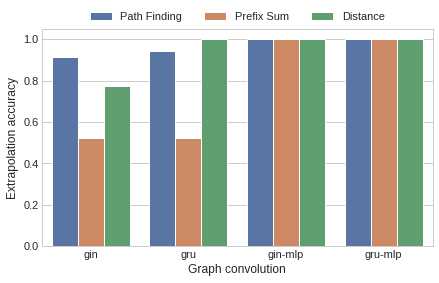

In [61]:
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])
plot_data = best_epochs_best_model.copy()
plot_data.dataset = plot_data.dataset.str.replace('tree-path', 'Path Finding')
plot_data.dataset = plot_data.dataset.str.replace('prefix', 'Prefix Sum')
plot_data.dataset = plot_data.dataset.str.replace('distance', 'Distance')
plot = sns.barplot(x='conv', y='generalization_acc', hue='dataset', hue_order = ['Path Finding', 'Prefix Sum', 'Distance'], data=best_epochs_best_model, order=['gin', 'gru', 'gin-mlp', 'gru-mlp'])
#plot.set(yscale="log")
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=3, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Graph convolution", ylabel = "Extrapolation accuracy")

plt.savefig('model-comparison.pdf', dpi=300)

# Grokking -> maybe Appendix?

In [ ]:
values_best_model = best_model[(best_model.epoch < 200)&(best_model.conv=='gin-mlp')]

In [ ]:
dataset = 'distance'
#fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.lineplot(x='epoch', y='valid_acc', label='validation accuracy', estimator='mean', data = values_best_model[values_best_model.dataset == dataset])
#plot.set(yscale="log")
#ax2 = ax.twinx()
plot = sns.lineplot(x='epoch', y='generalization_acc', label='generalization accuracy', estimator='mean', data = values_best_model[values_best_model.dataset == dataset])
plt.show()

# Skip and no skip comparison

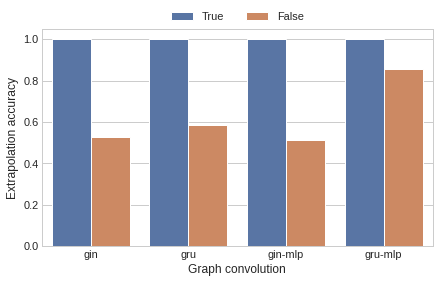

In [77]:
from numpy import median
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])
#plt.style.use(plt.style.available[26])
last_epoch = df[(df.epoch == 1000)&(df.dataset=='prefix')]
plot = sns.barplot(x='conv', y='generalization_acc', hue='skip_input', estimator=max, data=last_epoch, ci=None, order=['gin', 'gru', 'gin-mlp', 'gru-mlp'], hue_order = [True, False])
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=2, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Graph convolution", ylabel = "Extrapolation accuracy")
#plot.set(yscale="log")
plt.savefig('skip-input-performance.pdf', dpi=300)

# Generalization

## This code is not used anymore

In [ ]:
from model import RecGNN
import torch
import gnn
import datasets
from torch_geometric.loader import DataLoader
from functools import partialmethod
from tqdm import tqdm
import numpy as np

In [ ]:
df_generalization = df_best_parameters.copy()
df_generalization['model_rank'] = df_generalization[(df_generalization.epoch == 1000)&(df_generalization.dataset=='prefix')&(df_generalization.conv=='gin-mlp')].groupby(by=['use_l2', 'use_weight_decay'], as_index=False)['generalization_loss'].rank(method='min')
df_generalization = df_generalization[df_generalization.epoch == 1000]
df_generalization = df_generalization[df_generalization.model_rank == 1]
df_generalization[['use_l2', 'use_weight_decay', 'generalization_loss', 'model_string']]

In [ ]:
sns.set(rc={'figure.figsize':(7,4)})
#plt.style.use(plt.style.available[24])
plot = sns.lineplot(x='size', y='accuracy', hue=values[['use_l2', 'use_weight_decay']].apply(tuple, axis=1), ci=None, estimator=n, data = values)
#plot.set(xscale="log")
plt.savefig('generalization.pdf', dpi=300)

## This code just reads the csv with the results

In [ ]:
df_generalization = pd.read_csv('output_generalization_gru.csv')

In [ ]:
results = df_generalization.groupby(by=['dataset', 'size', 'use_l2'], as_index=False).agg({'accuracy':['mean','std']})

In [ ]:
results[results['use_l2'] == True]

# Stabilization

In [ ]:
dataclass = datasets.PrefixSum()
data_stabilization = []
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)
dataset = dataclass.makedata(num_graphs=1, num_nodes=100)
loader = DataLoader(dataset, batch_size=1, shuffle=False)
for i in np.arange(0.0, 15.2, 0.2):
    for j in range(len(generalization_models)):
        data_stabilization.append([i, gnn.test(generalization_models[j][0], 'cpu', loader, i)[1]] + generalization_models[j][1:])

## Use this to read the csv instead of running the model

In [65]:
import numpy as np

In [63]:
df_stabilization = pd.read_csv('output_stabilization.csv')

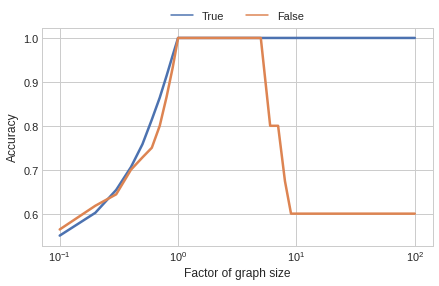

In [74]:
#values = pd.DataFrame(data_stabilization, columns =['fraction', 'accuracy', 'use_l2', 'use_weight_decay'])
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])
#g = sns.FacetGrid(df_stabilization, col='dataset')
#g.map_dataframe(sns.lineplot, x='factor', y='accuracy', hue='use_l2', estimator=np.mean, ci=None)
plot = sns.lineplot(linewidth=2.5, x='factor', y='accuracy', hue='use_l2', estimator=np.mean, ci=None, data = df_stabilization[df_stabilization.dataset=='prefix'], hue_order=[True, False])
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=3, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Factor of graph size", ylabel = "Accuracy")

plt.xscale('log')
plt.savefig('stabilization.pdf', dpi=300)

# Nothing useful beyond this point, keep your sanity and stop scrolling

In [ ]:
best_model_wo_l2 = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==True)&(df.hidden_state_factor==4)&(df.use_weight_decay==False)&(df.use_l2==False)&(df.conv=='gin-mlp')&(df.dataset!='midpoint')]
best_model_with_l2 = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==True)&(df.hidden_state_factor==4)&(df.use_weight_decay==False)&(df.use_l2==True)&(df.conv=='gin-mlp')&(df.dataset!='midpoint')]

In [ ]:
model_prefix_wo_l2 = 'model_train_' + best_model_wo_l2[best_model_wo_l2.dataset=='prefix'].model_string.unique()[0]
model_prefix_with_l2 = 'model_train_' + best_model_with_l2[best_model_with_l2.dataset=='prefix'].model_string.unique()[0]

In [ ]:
model_prefix

In [ ]:
model_wo_l2 = RecGNN(4, 8, 2, 4, 0.2, 'gin-mlp', True, True)
model_with_l2 = RecGNN(4, 8, 2, 4, 0.2, 'gin-mlp', True, True)
model_wo_l2.load_state_dict(torch.load(model_prefix_wo_l2, map_location=torch.device('cpu')))
model_with_l2.load_state_dict(torch.load(model_prefix_with_l2, map_location=torch.device('cpu')))

In [ ]:
data_generalization = []
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)
for i in range(10, 750, 2):
    dataset = dataclass.makedata(num_graphs=10, num_nodes=i)
    loader = DataLoader(dataset, batch_size=1, shuffle=False)
    data_generalization.append([i, gnn.test(model_wo_l2, 'cpu', loader, 1.2)[1], False])
    data_generalization.append([i, gnn.test(model_with_l2, 'cpu', loader, 1.2)[1], True])

In [ ]:
values = pd.DataFrame(data_generalization, columns =['size', 'accuracy', 'use_l2'])
sns.set(rc={'figure.figsize':(7,4)})
#plt.style.use(plt.style.available[24])
plot = sns.lineplot(x='size', y='accuracy', hue='use_l2', estimator='mean', data = values)
plt.savefig('generalization.pdf', dpi=300)

In [ ]:
data_stabilization = []
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)
dataset = dataclass.makedata(num_graphs=10, num_nodes=100)
loader = DataLoader(dataset, batch_size=1, shuffle=False)
for i in np.arange(0.0, 15.2, 0.2):
    #print(i)
    data_stabilization.append([i, gnn.test(model_wo_l2, 'cpu', loader, i)[1], False])
    data_stabilization.append([i, gnn.test(model_with_l2, 'cpu', loader, i)[1], True])

In [ ]:
values = pd.DataFrame(data_stabilization, columns =['fraction', 'accuracy', 'use_l2'])
sns.set(rc={'figure.figsize':(7,4)})
#plt.style.use(plt.style.available[24])
plot = sns.lineplot(x='fraction', y='accuracy', hue='use_l2', estimator='mean', data = values)
plt.savefig('stabilization.pdf', dpi=300)

In [ ]:
best_model = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==False)&(df.hidden_channels==8)&(df.hidden_state_factor==4)&(df.use_weight_decay==False)&(df.use_l2==True)&(df.dataset=='prefix')&(df.conv=='gin-mlp')]

In [ ]:
best_model = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==False)&(df.hidden_channels==8)&(df.hidden_state_factor==4)&(df.use_weight_decay==False)&(df.use_l2==True)&(df.dataset=='prefix')&(df.conv=='gin-mlp')]
plot = sns.lineplot(x='epoch', y='valid_loss', hue='use_l2', estimator='mean', data = best_model)
sns.set(rc={'figure.figsize':(10,5)})
plot.set(yscale="log")
sns.set(rc={'figure.figsize':(10,5)})

In [ ]:
df.columns.values

In [ ]:
best_model = df[(df.hidden_channels==8)&(df.dropout==0.2)&(df.batch_size==1)&(df.skip_input==True)&(df.skip_previous==False)&(df.hidden_channels==8)&(df.hidden_state_factor==4)&(df.use_weight_decay==False)&(df.use_l2==False)&(df.dataset=='prefix')&(df.conv=='gin-mlp')]
plot = sns.lineplot(x='epoch', y='valid_loss', hue='use_l2', estimator='mean', data = best_model)
sns.set(rc={'figure.figsize':(10,5)})
plot.set(yscale="log")